In [81]:
import numpy as np
import pandas as pd

In [82]:
data=pd.read_csv('/kaggle/input/solar-flares-rhessi/hessi.solar.flare.UP_To_2018.csv')

# Variables

- Taken from: https://www.kaggle.com/datasets/khsamaha/solar-flares-rhessi/data? select=hessi.solar.flare.UP_To_2018.csv

- Note that only events with non-zero position and energy range not equal to 3-6 keV are confirmed as solar sources.

- Events which have no position and show up mostly in the front detectors, but were not able to be imaged are flagged as "PS".

- Events which do not have valid position are only confirmed to be non-solar if the NS flag is set.

- Peak Rate: peak counts/second in energy range 6-12 keV, averaged over active collimators, including background.

- Total Counts: counts in energy range 6-12 keV integrated over duration of flare summed over all subcollimators, including background.

- Energy: the highest energy band in which the flare was observed.

- Radial Distance: distance from Sun center

- Quality Codes: Qn, where n is the total number of data gap, SAA, particle, eclipse or decimation flags set for event. n ranges from 0 to 11. Use care when analyzing the data when the quality is not zero.

- Active_Region: A number for the closest active region, if available

- radial_offset: the offset of the flare position from the spin axis of the spacecraft in arcsec. This is used in spectroscopy.

- peak_c/s: peak count rate in corrected counts.

## Flare Flag Codes:

- a0 - In attenuator state 0 (None) sometime during flare
- a1 - In attenuator state 1 (Thin) sometime during flare
- a2 - In attenuator state 2 (Thick) sometime during flare
- a3 - In attenuator state 3 (Both) sometime during flare
- An - Attenuator state (0=None, 1=Thin, 2=Thick, 3=Both) at peak of flare
- DF - Front segment counts were decimated sometime during flare
- DR - Rear segment counts were decimated sometime during flare
- ED - Spacecraft eclipse (night) sometime during flare
- EE - Flare ended in spacecraft eclipse (night)
- ES - Flare started in spacecraft eclipse (night)
- FE - Flare ongoing at end of file
- FR - In Fast Rate Mode
- FS - Flare ongoing at start of file
- GD - Data gap during flare
- GE - Flare ended in data gap
- GS - Flare started in data gap
- MR - Spacecraft in high-latitude zone during flare
- NS - Non-solar event
- PE - Particle event: Particles are present
- PS - Possible Solar Flare; in front detectors, but no position
- Pn - Position Quality: P0 = Position is NOT valid, P1 = Position is valid
- Qn - Data Quality: Q0 = Highest Quality, Q11 = Lowest Quality
- SD - Spacecraft was in SAA sometime during flare
- SE - Flare ended when spacecraft was in SAA
- SS - Flare started when spacecraft was in SAA

### 1. Clustering Based on Flare Flags

* Objective: Use flare flags to cluster solar flares into groups with similar conditions. Examine the characteristics of each cluster to understand the influence of different flags on cluster formation.

In [83]:
data.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [84]:
#Filter the dataset to focus on confirmed solar sources (events with non-zero positions and energy range not equal to 3-6 keV).

energy= data['energy.kev']!='3-6'
flags= ~data[['flag.1','flag.2','flag.3','flag.4','flag.5']].isin(['NS','PS','P0']).any(axis=1)
fil_data=data[energy&flags]

In [85]:
fil_data.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [86]:
#Switch around the flags and check if there any unrequired values retains in the new filtered data
fil_data['flag.2'].value_counts()

flag.2
P1    39341
DF    35039
DR    24296
A1     4234
GE     1999
GS     1441
a1     1424
ES      877
EE      539
A3       78
GD       70
a3       26
Name: count, dtype: int64

In [87]:
columns_to_replace = ['flag.1', 'flag.2', 'flag.3', 'flag.4', 'flag.5']
replacements = {'a0': 'A0', 'a1': 'A1', 'a2': 'A2', 'a3': 'A3'}

for col in columns_to_replace:
    fil_data.loc[:, col] = fil_data[col].replace(replacements)


In [88]:
fil_data['flag.5'].unique()

array([nan, 'Q2', 'SE', 'Q1', 'P1 PE Q1', 'PE Q3', 'P1 Q2', 'Q3 SE',
       'PE Q4 SE', 'SS', 'PE Q2', 'P1 PE Q3', 'GE P1 PE Q4', 'P1 PE Q4',
       'Q2 SE', 'GD P1 PE Q3', 'ES P1 Q2', 'P1 Q3', 'PE Q3 SE', 'SE SS',
       'EE P1 Q2', 'PE Q3 SD', 'GS P1 Q3', 'P1 PE Q2', 'PE Q1', 'P1 Q1',
       'GS P1 Q4', 'GS P1 Q2', 'SD SE', 'SD SE SS', 'GD P1 PE Q4',
       'P1 PE Q5 SE', 'P1 PE Q4 SE', 'Q4 SD SE', 'ES P1 PE Q4',
       'GD GE P1 PE Q5', 'EE P1 Q3', 'ES P1 Q3', 'P1 PE Q6 SD SE',
       'GS P1 PE Q7 SD SS', 'GE P1 PE Q3', 'GE P1 Q4 SE', 'SD',
       'GS P1 PE Q5', 'Q3 SD', 'GS P1 PE Q4', 'SD SS', 'DR P1 Q2',
       'DR ES GD P1 PE Q6 SE', 'DR EE P1 PE Q4', 'ES GE P1 PE Q5',
       'EE P1 PE Q4', 'Q4 SD SS', 'ES P1 PE Q5 SE', 'DR GS P1 PE Q4',
       'EE ES P1 Q4', 'DR GE P1 PE Q4', 'GE P1 PE Q5', 'P1 PE Q5 SD',
       'DR P1 PE Q3', 'EE GS P1 Q4', 'P1 Q3 SE', 'GE P1 PE Q5 SE',
       'ES GE P1 PE Q4', 'EE GS P1 Q3', 'DR ES GE P1 PE Q5',
       'DR ES P1 Q3', 'DR GS P1 Q3', 'DR ES P1 P

In [89]:
fil_data['energy.kev'].value_counts()

energy.kev
6-12          86959
12-25         19637
25-50          2055
50-100          480
100-300         218
300-800          12
800-7000          2
7000-20000        1
Name: count, dtype: int64

In [90]:
flags=['A1','A2','A3','A0','DF','DR','ED','EE','ES','FE','FR','FS','GD','GE','GS','MR','PE','P1','Q0','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q8','Q9','Q10','Q11','SD','SE','SS']
flag_col=['flag.1','flag.2','flag.3','flag.4','flag.5']
for i in flags:
    fil_data[i]=fil_data[flag_col].apply (lambda row:1 if i in row.values else 0, axis=1)

/tmp/ipykernel_36/398583310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data[i]=fil_data[flag_col].apply (lambda row:1 if i in row.values else 0, axis=1)
/tmp/ipykernel_36/398583310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data[i]=fil_data[flag_col].apply (lambda row:1 if i in row.values else 0, axis=1)
/tmp/ipykernel_36/398583310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [91]:
fil_data.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,...,Q5,Q6,Q7,Q8,Q9,Q10,Q11,SD,SE,SS
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,...,0,0,0,0,0,0,0,0,0,0
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,...,0,0,0,0,0,0,0,0,0,0
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,...,0,0,0,0,0,0,0,0,0,0
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,...,0,0,0,0,0,0,0,0,0,0
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,...,0,0,0,0,0,0,0,0,0,0


In [92]:
fil_data['Q1'].value_counts()

Q1
0    68941
1    40423
Name: count, dtype: int64

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
x= fil_data[flags]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

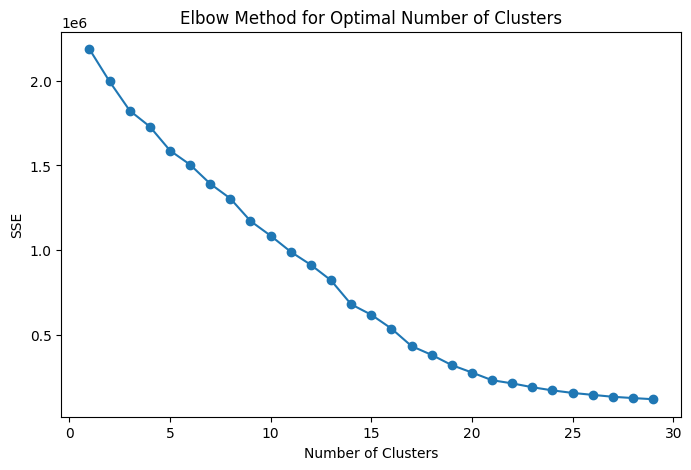

In [95]:
sse = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

#Look for the point where the SSE begins to decrease more slowly. This point is considered the "elbow" and indicates the optimal number of clusters.

In [96]:
# Apply K-Means clustering
num_clusters = 17  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
fil_data.loc[:,'Cluster'] = kmeans.fit_predict(x_scaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_36/1143820918.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_data.loc[:,'Cluster'] = kmeans.fit_predict(x_scaled)


In [97]:
# silhouette score
sil_score = silhouette_score(x_scaled, fil_data['Cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5272128948273171


In [98]:
centroids_df = pd.DataFrame(cluster_centers, columns=flags)
print(centroids_df)


              A1            A2            A3            A0            DF  \
0   1.385404e-02  8.012932e-19 -2.233456e-16  1.000000e+00 -6.439294e-15   
1   2.419054e-02  8.961609e-19 -2.896988e-16  1.000000e+00  2.871659e-01   
2  -1.387779e-17  1.694066e-21 -4.336809e-19  1.000000e+00  0.000000e+00   
3   7.327472e-15  7.674119e-19 -2.484991e-16  1.000000e+00  3.639718e-01   
4   9.703264e-01  6.776264e-21  1.000000e+00  6.617211e-01  6.290801e-01   
5   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
6   1.000000e+00  1.643244e-19  8.933826e-17  1.332268e-14  2.165295e-01   
7   0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
8   1.699189e-01  6.522154e-19 -8.890458e-17  1.000000e+00  9.676254e-01   
9   9.226006e-02 -1.372193e-19 -3.079134e-17  1.000000e+00  2.547988e-01   
10  5.120773e-02  1.694066e-20 -1.344411e-17  9.700483e-01  9.082126e-02   
11  1.962025e-01 -8.470329e-21  1.898734e-02  9.367089e-01  3.544304e-01   
12 -1.387779

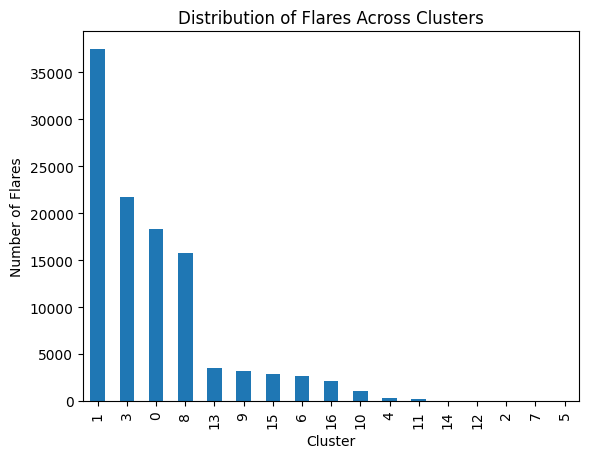

In [99]:
cluster_counts = fil_data['Cluster'].value_counts()
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Flares')
plt.title('Distribution of Flares Across Clusters')
plt.show()


From the bar chart,we can see that cluster 1 has the highest number of flares, followed by clusters 3,0 and 8.

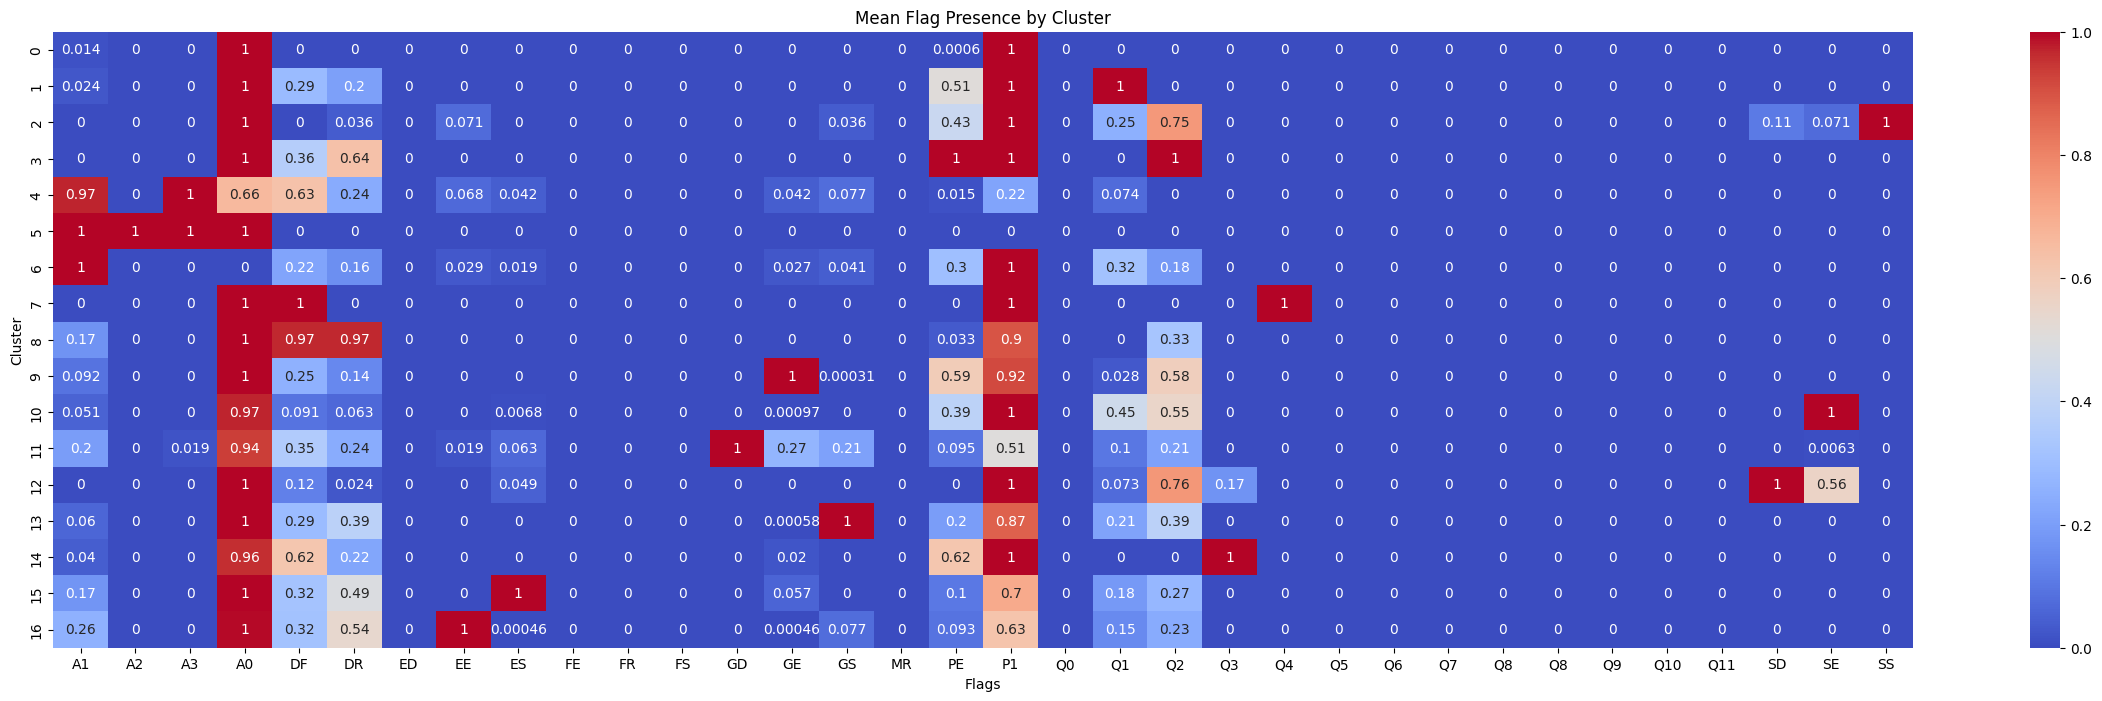

In [100]:
# Calculate the mean presence of each flag in each cluster
cluster_means = fil_data.groupby('Cluster')[flags].mean()
plt.figure(figsize=(30, 8))  
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Mean Flag Presence by Cluster')
plt.xlabel('Flags')
plt.ylabel('Cluster')
plt.show()


- Cluster 1: Most of the flares are common in A0, P1, Q1
- Cluster 3: Most of the flares are common in A0, PE, P1, Q2
- Cluster 0: Most of the flares are common in A0, P1
- Cluster 8: Most of the flares are common in A0, DF, DR, P1

### Cluster Analysis Summary

1. Cluster 1:
- Common Flags: A0, P1, Q1 
- Interpretation: This cluster has the highest number of flares and is characterized by the presence of flags A0, P1, and Q1.
- A0 (Attenuator State 0): Indicates that the flare events occurred when the attenuator was in state 0 (None). This might suggest that the flares in this cluster were observed without any attenuation.
- P1 (Position Quality 1): Indicates valid position information. This implies that the flares in this cluster had reliable positional data.
- Q1 (Data Quality 1): Indicates a relatively high quality of data. The flares in this cluster had fewer issues with data quality.
- Conclusion: Cluster 1 represents a large group of solar flares with high-quality data and reliable positional information, likely observed without attenuation.

2. Cluster 3:

- Common Flags: A0, PE, P1, Q2
- Interpretation: This cluster has fewer flares compared to Cluster 1 and includes flags A0, PE, P1, and Q2.
- PE (Particle Event): Indicates the presence of particle events during the flare, which may have influenced the observations.
- Q2 (Data Quality 2): Indicates moderate data quality. The data for these flares might have some issues but is still usable.
- Conclusion: Cluster 3 represents flares that occurred without attenuation but were affected by particle events, with moderate data quality.

3. Cluster 0:

- Common Flags: A0, P1
- Interpretation: This cluster also has fewer flares and is characterized by flags A0 and P1.
- A0 (Attenuator State 0): Similar to Cluster 1, indicating no attenuation during the observation.
- P1 (Position Quality 1): Indicates valid position information.
- Conclusion: Cluster 0 represents a group of flares with no attenuation and reliable positional data, but it is less frequent compared to Cluster 1.

4. Cluster 8:

- Common Flags: A0, DF, DR, P1
- Interpretation: This cluster includes the flags A0, DF, DR, and P1.
- DF (Front Segment Decimated): Indicates that front segment counts were decimated, possibly affecting the data quality.
- DR (Rear Segment Decimated): Indicates that rear segment counts were also decimated.
- Conclusion: Cluster 8 represents flares with no attenuation but with decimation in both front and rear segment counts, which might impact data accuracy.

### Key Insights from Cluster Comparison:

1. Ideal Conditions (Cluster 1): Cluster 1 appears to represent the most ideal observational conditions for solar flares, with no attenuation, high positional accuracy, and high data quality. Flares in this cluster could be used as a benchmark or reference for studying solar flare characteristics.

2. Impact of Particle Events (Cluster 3): Cluster 3 shows that particle events can occur during flare observations, potentially affecting data quality. This highlights the need to account for such events when analyzing flare data, as they can introduce noise or errors.

3. Reliable but Less Detailed Observations (Cluster 0): Cluster 0 suggests that even without specific high data quality indicators, reliable positional data can still be obtained without attenuation. However, the lack of a high data quality flag suggests these flares might not be as thoroughly validated as those in Cluster 1.

4. Data Decimation Impact (Cluster 8): The presence of decimation in Cluster 8 indicates that some flares may have experienced data loss or reduction, affecting the completeness of the observation. This is crucial for understanding how data processing (like decimation) can impact the final analysis and interpretation of flare events.

## Detailed Analysis of Flares in Cluster 1

In [101]:
fil_data.columns

Index(['flare', 'start.date', 'start.time', 'peak', 'end', 'duration.s',
       'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec', 'y.pos.asec',
       'radial', 'active.region.ar', 'flag.1', 'flag.2', 'flag.3', 'flag.4',
       'flag.5', 'A1', 'A2', 'A3', 'A0', 'DF', 'DR', 'ED', 'EE', 'ES', 'FE',
       'FR', 'FS', 'GD', 'GE', 'GS', 'MR', 'PE', 'P1', 'Q0', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'SD', 'SE', 'SS',
       'Cluster'],
      dtype='object')

In [102]:
# Filter data to include only flares from Cluster 1
cluster_1_data = fil_data[fil_data['Cluster'] == 1]

In [103]:
cluster_1_data['energy.kev'].value_counts()

energy.kev
6-12        32302
12-25        4802
25-50         321
50-100         55
100-300        13
800-7000        1
Name: count, dtype: int64

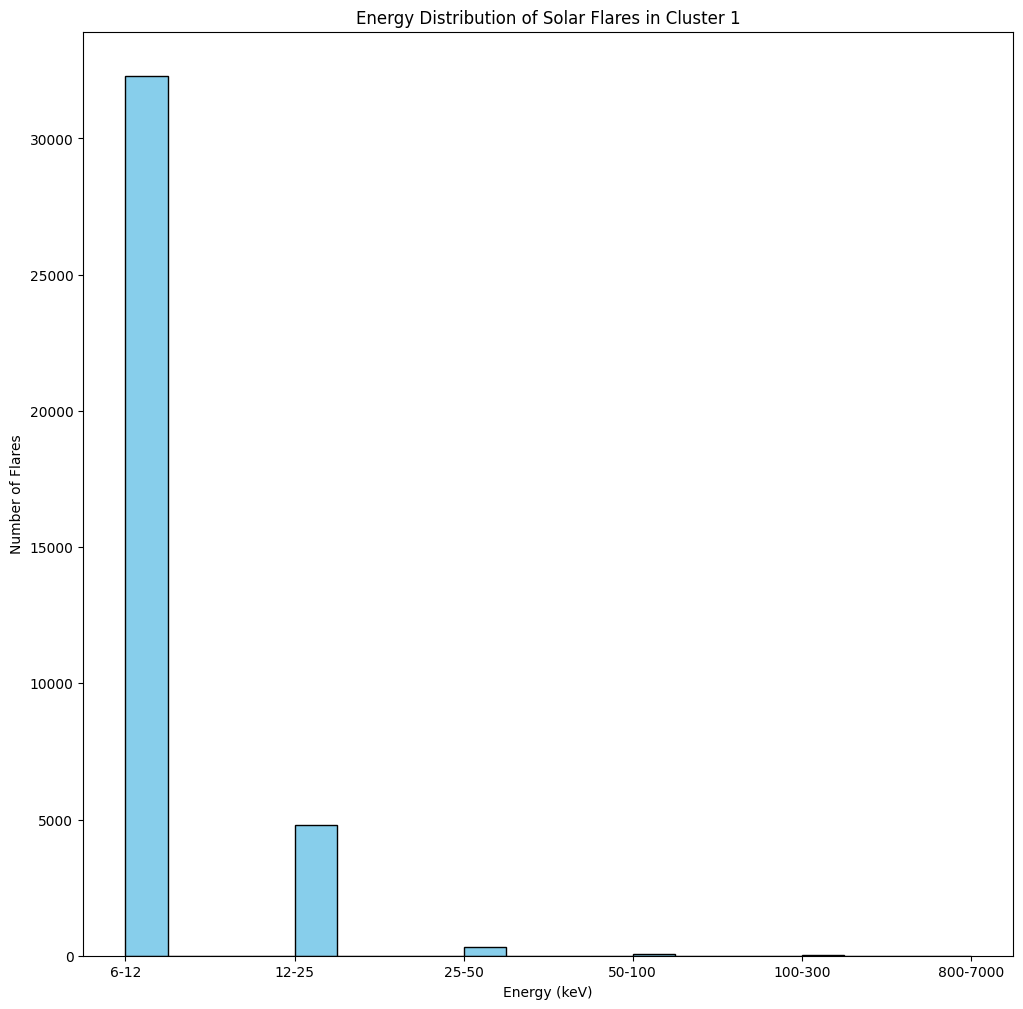

In [104]:
plt.figure(figsize=(12, 12))
plt.hist(cluster_1_data['energy.kev'], bins=20, color='skyblue', edgecolor='black')
plt.title('Energy Distribution of Solar Flares in Cluster 1')
plt.xlabel('Energy (keV)')
plt.ylabel('Number of Flares')
plt.show()


### Predicting the timing of the peak flare in cluster 1

In [105]:
cluster_1_data.loc[:,'start_time'] = pd.to_timedelta(cluster_1_data['start.time'])
cluster_1_data.loc[:,'peak_time'] = pd.to_timedelta(cluster_1_data['peak'])
cluster_1_data.loc[:,'end_time'] = pd.to_timedelta(cluster_1_data['end'])

/tmp/ipykernel_36/1962525563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data.loc[:,'start_time'] = pd.to_timedelta(cluster_1_data['start.time'])
/tmp/ipykernel_36/1962525563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data.loc[:,'peak_time'] = pd.to_timedelta(cluster_1_data['peak'])
/tmp/ipykernel_36/1962525563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [106]:
cluster_1_data.loc[:,'time_to_peak'] = (cluster_1_data['peak_time'] - cluster_1_data['start_time']).dt.total_seconds()

/tmp/ipykernel_36/3915116500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data.loc[:,'time_to_peak'] = (cluster_1_data['peak_time'] - cluster_1_data['start_time']).dt.total_seconds()


In [107]:
cluster_1_data['time_to_peak']

19        534.0
46        162.0
47         94.0
55        198.0
56        294.0
          ...  
116115    262.0
116120    334.0
116122     70.0
116123     62.0
116142    134.0
Name: time_to_peak, Length: 37494, dtype: float64

In [108]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cluster_1_data.loc[:,'energy.kev_enc'] = label_encoder.fit_transform(cluster_1_data['energy.kev'])

/tmp/ipykernel_36/3108899903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data.loc[:,'energy.kev_enc'] = label_encoder.fit_transform(cluster_1_data['energy.kev'])


In [109]:
cluster_1_data.loc[:,'lag_1'] = cluster_1_data['peak.c/s'].shift(1)
cluster_1_data.loc[:,'lag_2'] = cluster_1_data['peak.c/s'].shift(2)
cluster_1_data.loc[:,'rolling_mean'] = cluster_1_data['peak.c/s'].rolling(window=3).mean()

features = ['rolling_mean','radial']
X = cluster_1_data[features].dropna()
y = cluster_1_data['time_to_peak'].loc[X.index]


/tmp/ipykernel_36/251926776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data.loc[:,'lag_1'] = cluster_1_data['peak.c/s'].shift(1)
/tmp/ipykernel_36/251926776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_data.loc[:,'lag_2'] = cluster_1_data['peak.c/s'].shift(2)
/tmp/ipykernel_36/251926776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 479.6365054524364


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Linear Regression MAE: {mae_linear}")


Linear Regression MAE: 392.33046387808963


In [112]:
from sklearn.tree import DecisionTreeRegressor


tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"Decision Tree MAE: {mae_tree}")


Decision Tree MAE: 509.1883297771456


In [113]:
from sklearn.ensemble import GradientBoostingRegressor


gboost_model = GradientBoostingRegressor(random_state=42)
gboost_model.fit(X_train, y_train)
y_pred_gboost = gboost_model.predict(X_test)
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
print(f"Gradient Boosting MAE: {mae_gboost}")


Gradient Boosting MAE: 416.4970277713302


In [114]:
from sklearn.svm import SVR


svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"SVR MAE: {mae_svr}")


SVR MAE: 282.71116041432253


In [115]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")


XGBoost MAE: 497.15829153064306


In [116]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
print(f"Neural Network MAE: {mae_mlp}")


Neural Network MAE: 361.2557048808639


In [117]:
from sklearn.ensemble import GradientBoostingRegressor


gboost_model = GradientBoostingRegressor(random_state=42)
gboost_model.fit(X_train, y_train)
y_pred_gboost = gboost_model.predict(X_test)
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
print(f"Gradient Boosting MAE: {mae_gboost}")


Gradient Boosting MAE: 416.4970277713302


<Axes: >

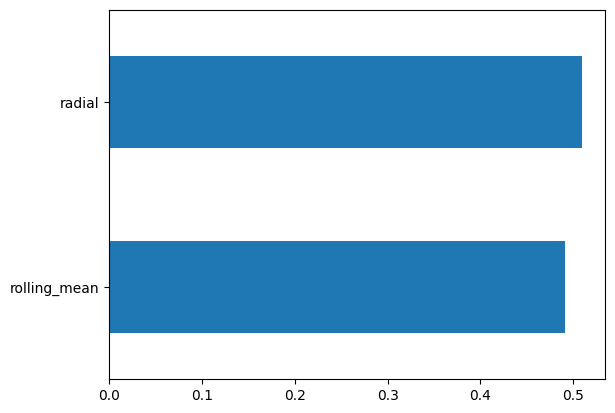

In [118]:
# Feature importance to see which features gives higher influence, given that we add more features into the model
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features)
feature_importance.sort_values().plot(kind='barh')


- Support Vector Regressor (SVR) gave the lowest MAE od 282.71 seconds off which the model's prediction for timing of peak flare are off by 4.7118 minutes. 
- The project successfully utilized machine learning models to predict the timing of solar flare peaks. The SVR model was identified as the most accurate, achieving a notable reduction in prediction error. The insights gained from clustering and modeling offer valuable understanding of solar flare events and their characteristics.
- Future work could involve refining the SVR model further, exploring additional features, or applying more advanced techniques to improve prediction accuracy.

In [119]:
fil_data.to_csv('solar_filtered_data.csv', index=False)
cluster_1_data.to_csv('solar_cluster_1.csv', index=False)